# Data Analytics -  Lab 1 - Random data visualisation and sampling

1. Create a ```jupyter``` notebook.


In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

2. Using ```numpy.random``` generate arrays of:
   - 1000 samples of uniform distribution on interval $[0,1]$
   - 1000 samples of normal distribution with mean $\mu=0$ and standard deviation $\sigma=1$.
   - 1000 samples of normal distribution with mean $\mu=0$ and standard deviation $\sigma=10$.
   - 1000 samples of beta distribution for the following pairs of parameters $(\alpha,\beta)\in\{(1,1), (2,2),(3,9)\}$
   - 10000 samples of two-dimensional normal distributions each with  mean $\mu=[0,0]^\mathsf{T}$ and covariance matrices
$$
\Sigma_1=\begin{bmatrix}1&0\\0&1\end{bmatrix}
$$

$$
\Sigma_2=\begin{bmatrix}2&1\\1&2\end{bmatrix}
$$


In [83]:
distributions = {}
distributions['uniform_0_1'] = np.random.uniform(0, 1, 1000)
distributions['normal_mu0_sig1'] = np.random.normal(0, 1, 1000)
distributions['normal_mu0_sig10'] = np.random.normal(0, 10, 1000)
distributions['beta_a1_b1'] = np.random.beta(1, 1, 1000)
distributions['beta_a2_b2'] = np.random.beta(2, 2, 1000)
distributions['beta_a3_b9'] = np.random.beta(3, 9, 1000)

mu0 = np.array([0, 0])
cov1 = np.array([[1, 0], [0, 1]])
cov2 = np.array([[2, 1], [1, 2]])
distributions['normal2D_mu0_cov1'] = np.random.multivariate_normal(mu0, cov1, 10000)
distributions['normal2D_mu0_cov2'] = np.random.multivariate_normal(mu0, cov2, 10000)

3. For one dimensional distributions plot histograms. Assign bin values to represent the geometry of distribution. Compare the histograms (normalized) with plots of analytical formulas for distributions (see eg. Wikipedia).


In [84]:
def plotter_hist1D(data: np.ndarray, analytical_data, bins: int=40, title: str=""):
    # prepare analytical data
    min = np.min(data)
    max = np.max(data)
    # plot
    fig, ax = plt.subplots()
    ax.hist(x=data, bins=bins, density=True)
    aux_xlim = ax.get_xlim()
    ax.plot(analytical_data[0], analytical_data[1], linewidth=3)
    ax.set_xlim(aux_xlim)
    ax.set_title(title)
    plt.show()

In [85]:
analytical_x = np.arange(-40, 40, 0.001)

analytical_y = {}
analytical_y['uniform_0_1']      = stats.uniform.pdf(analytical_x)
analytical_y['normal_mu0_sig1']  = stats.norm.pdf(analytical_x, 0.0, 1.0)
analytical_y['normal_mu0_sig10'] = stats.norm.pdf(analytical_x, 0.0, 10.0)
analytical_y['beta_a1_b1']       = stats.beta.pdf(analytical_x, 1.0, 1.0)
analytical_y['beta_a2_b2']       = stats.beta.pdf(analytical_x, 2.0, 2.0)
analytical_y['beta_a3_b9']       = stats.beta.pdf(analytical_x, 3.0, 9.0)

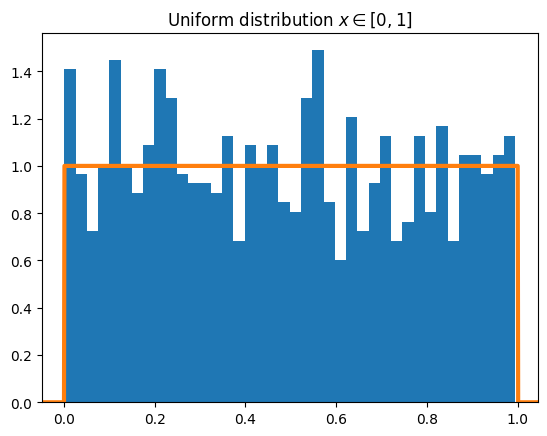

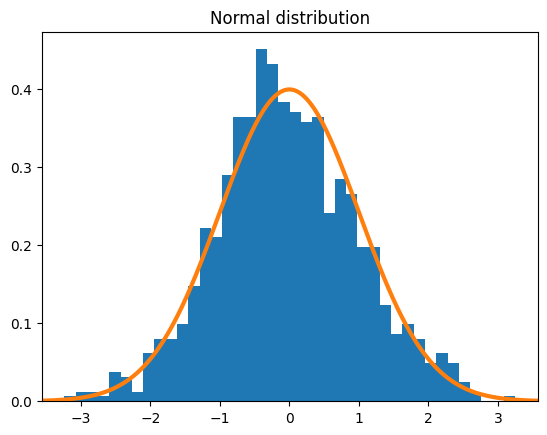

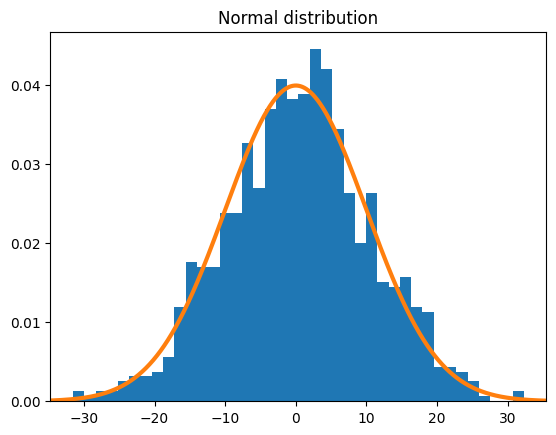

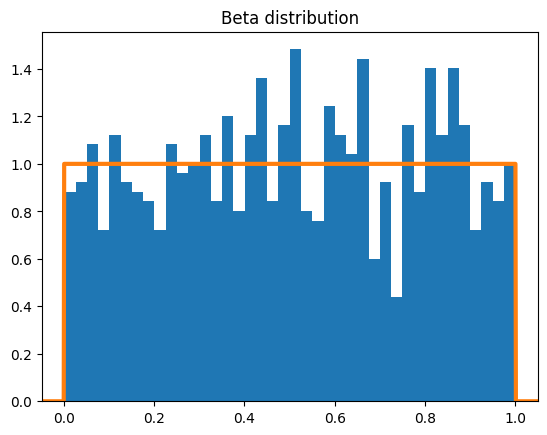

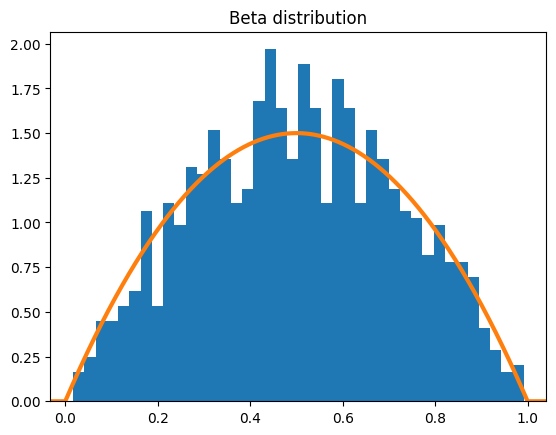

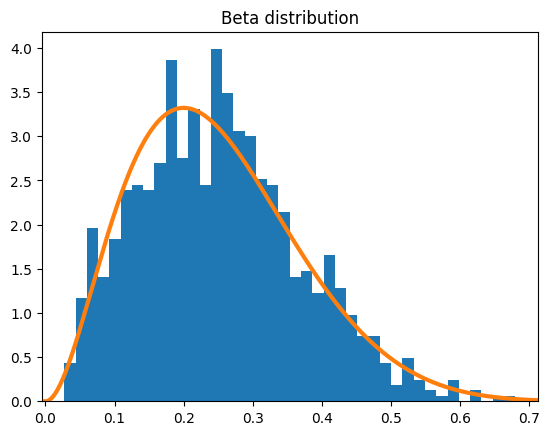

In [86]:
aux_bins = 40
plotter_hist1D(distributions['uniform_0_1'], (analytical_x, analytical_y['uniform_0_1']), bins=aux_bins, title="Uniform distribution $x\in [0,1]$")
plotter_hist1D(distributions['normal_mu0_sig1'], (analytical_x, analytical_y['normal_mu0_sig1']), bins=aux_bins, title='Normal distribution')
plotter_hist1D(distributions['normal_mu0_sig10'], (analytical_x, analytical_y['normal_mu0_sig10']), bins=aux_bins, title='Normal distribution')
plotter_hist1D(distributions['beta_a1_b1'], (analytical_x, analytical_y['beta_a1_b1']), bins=aux_bins, title='Beta distribution')
plotter_hist1D(distributions['beta_a2_b2'], (analytical_x, analytical_y['beta_a2_b2']), bins=aux_bins, title='Beta distribution')
plotter_hist1D(distributions['beta_a3_b9'], (analytical_x, analytical_y['beta_a3_b9']), bins=aux_bins, title='Beta distribution')


4. For two-dimensional distributions use ```hist2d``` method from ```pyplot```. Try to analyze influence of bins. Try different 2d histogram functions (ex. from ```seaborn```).


In [87]:
# Pyplot plotter
def plotter_hist2D(data: np.ndarray, bins: int=40, title: str=''):
    fig, ax = plt.subplots()
    ax.hist2d(x=data[:,0], y=data[:,1], bins=bins, cmap='Blues')
    ax.set(title=title, xlabel='X', ylabel='Y')
    plt.show()

# Seaborn plotter
def plotter_hist2D_seaborn(data: np.ndarray, bins: int=40, title: str=''):
    # prepare data
    df = pd.DataFrame(data, columns=['X', 'Y'])
    fig, ax = plt.subplots()
    sns.histplot(df, x='X', y='Y', bins=bins, ax=ax)
    ax.set(title=title)
    plt.show()

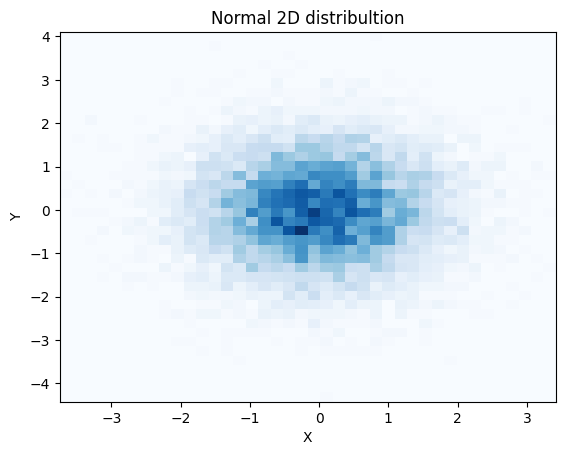

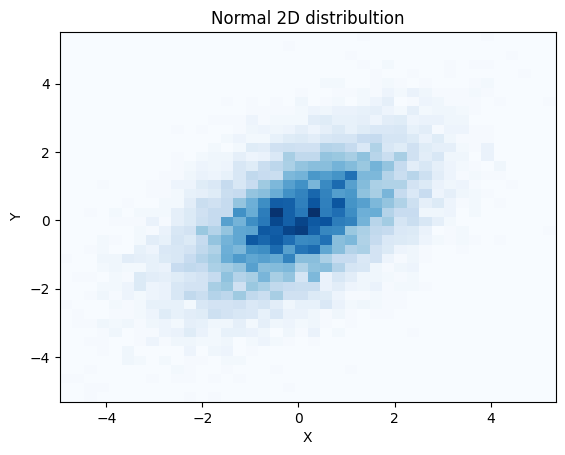

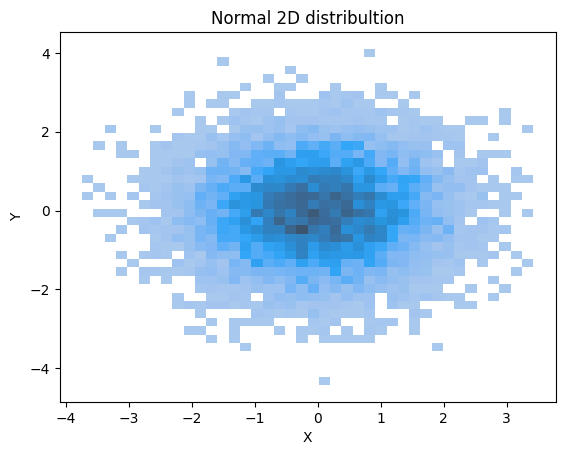

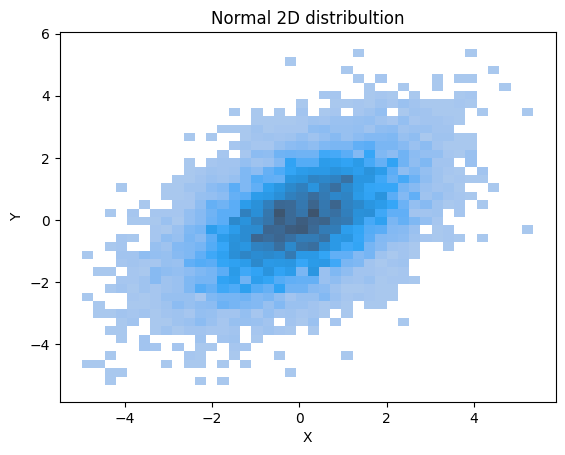

In [88]:
plotter_hist2D(distributions['normal2D_mu0_cov1'], bins=40, title='Normal 2D distribultion')
plotter_hist2D(distributions['normal2D_mu0_cov2'], bins=40, title='Normal 2D distribultion')

plotter_hist2D_seaborn(distributions['normal2D_mu0_cov1'], bins=40, title='Normal 2D distribultion')
plotter_hist2D_seaborn(distributions['normal2D_mu0_cov2'], bins=40, title='Normal 2D distribultion')

5. Generate 1000 $y$ points from the following model (
First sample $\alpha,\ \beta,\ x, \ \sigma$, then compute $\mu$ algebraically, then sample a value of $y$. Do this 1000 times. To get HalfNormal sample from Normal and take the absolute value of result)
$$
    \begin{aligned}
    y\sim{}& \mathrm{Normal}(\mu, \sigma)\\
    \mu={}& \alpha + \beta x\\
    \alpha\sim{}&\mathrm{Normal}(2,0.1)\\
    \beta\sim{}&\mathrm{Normal}(0.2,0.2)\\
    x\sim{}&\mathrm{Normal}(0,3)\\
    \sigma\sim{}&\mathrm{HalfNormal}(0,1)
    \end{aligned} 
$$ 


In [89]:
# sampling
alpha = np.random.normal(2.0, 0.1, 1000)
beta = np.random.normal(0.2, 0.2, 1000)
X = np.random.normal(0.0, 3.0, 1000)
sigma = np.abs(np.random.normal(0.0, 1.0, 1000))

# mu algebraic computing
mu = alpha + beta * X

# y sampling
Y = np.random.normal(mu, sigma)

6. Plot $y$ values as a function of $x$. Compare them with lines of $y=\alpha+\beta x$, plotted for $x$ between -6 and 6 for each of randomly sampled $\alpha$ and $\beta$ pair (on the same plot).  



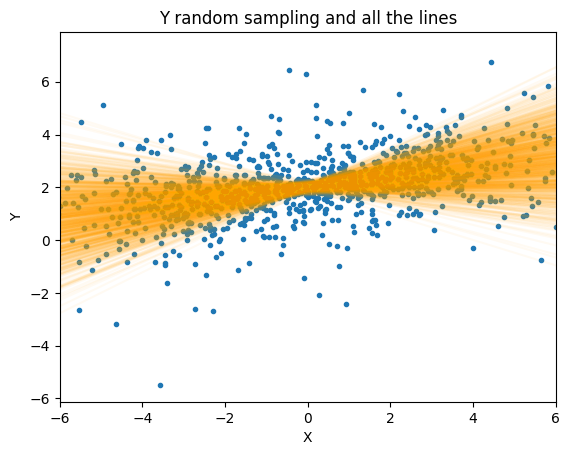

In [90]:
# prepare data
# i = np.random.randint(0, 1000)
I = np.arange(1000)
f = lambda x, i: alpha[i] + x * beta[i]
x = np.linspace(-6, 6)

# plot
fig, ax = plt.subplots()
ax.plot(X, Y, '.')
for i in I:
    ax.plot(x, f(x, i), color='orange', alpha=0.05)
ax.set(title='Y random sampling and all the lines',
    xlim=[-6, 6], xlabel='X', ylabel='Y')
plt.show()